In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./data/clear_data_vol2.csv')
data

,상권업종소분류코드,행정동코드,대지구분코드,건물관리번호,경도,위도,지점유무
0,2564,4215057100,1,4.215011e+24,128.904472,37.770252,0
1,2561,4215058000,1,4.215011e+24,128.920908,37.791299,0
2,2561,4276038000,1,4.276038e+24,128.717971,37.660051,0
3,2561,4215035000,1,4.215035e+24,129.052902,37.654680,0
4,2561,4213066000,1,4.213012e+24,127.917307,37.327668,0
...,...,...,...,...,...,...,...
2363989,2561,4311425300,1,4.371025e+24,127.414962,36.709197,0
2363990,2562,4311370000,1,4.311310e+24,127.474862,36.644013,0
2363991,2562,4311253000,1,4.311310e+24,127.462285,36.635306,0
2363992,2563,4311168000,1,4.311112e+24,127.504480,36.629324,0


In [3]:
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)
scaled_data

array([[-0.1417477 ,  0.54627367, -0.05276327, ...,  1.59163118,
         1.14018587, -0.42582045],
       [-0.23682452,  0.54627441, -0.05276327, ...,  1.61067179,
         1.15940754, -0.42582045],
       [-0.23682452,  0.59628443, -0.05276327, ...,  1.37557225,
         1.03953975, -0.42582045],
       ...,
       [-0.20513224,  0.62516444, -0.05276327, ..., -0.07912034,
         0.10364887, -0.42582045],
       [-0.17343997,  0.62509473, -0.05276327, ..., -0.0302378 ,
         0.09818618, -0.42582045],
       [-0.04667088,  0.67583465, -0.05276327, ...,  0.03785842,
        -0.15784846, -0.42582045]])

In [4]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
pca_data

array([[-0.60867228, -0.30125762],
       [-0.60379736, -0.30674389],
       [-0.65952711, -0.16235292],
       ...,
       [-0.73103495,  0.46345089],
       [-0.74500423,  0.42451924],
       [-0.92883605,  0.27545622]])

In [5]:
pca.explained_variance_ratio_

array([0.32170927, 0.16717361])

In [6]:
sum(pca.explained_variance_ratio_)

0.4888828802277748

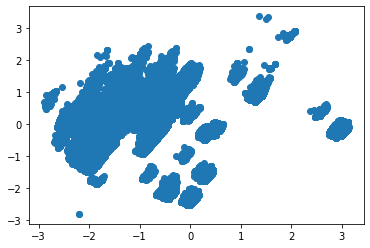

In [7]:
plt.scatter(pca_data[:,0], pca_data[:,1])
plt.show()

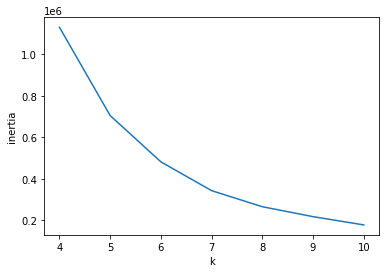

In [8]:
inertia = []
for k in range(4, 11):
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(pca_data)
    inertia.append(km.inertia_)

plt.plot(range(4, 11), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

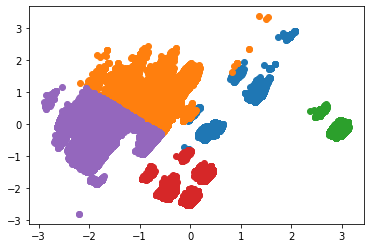

In [9]:
km = KMeans(n_clusters=5, random_state=0)
km.fit(pca_data)
for i in range(5):
    cond = km.labels_ == i
    plt.scatter(pca_data[cond,0], pca_data[cond,1])
plt.show()

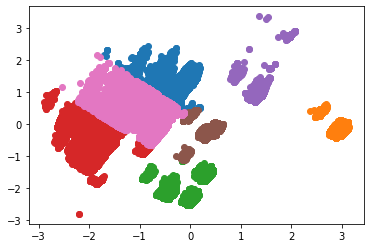

In [10]:
km = KMeans(n_clusters=7, random_state=0)
km.fit(pca_data)
for i in range(7):
    cond = km.labels_ == i
    plt.scatter(pca_data[cond,0], pca_data[cond,1])
plt.show()

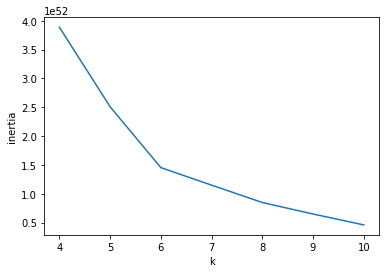

In [11]:
inertia = []
for k in range(4, 11):
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(data)
    inertia.append(km.inertia_)

plt.plot(range(4, 11), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [12]:
km = KMeans(n_clusters=6, random_state=0)
km.fit(data)

KMeans(n_clusters=6, random_state=0)

In [13]:
from collections import Counter
Counter(km.labels_)

Counter({0: 721472, 4: 396963, 5: 200733, 2: 366768, 1: 346229, 3: 331829})

In [14]:
data[km.labels_ == 0]['상권업종소분류코드'].unique()

array([2564, 2561, 2567, 2562, 2568, 2565, 2579, 2584, 2563, 2578, 2581,
       2583, 2580, 2577, 2566, 2832, 2560, 2576, 2592, 2713, 2595, 2585,
       2820, 2817, 2582, 2569, 2597, 2824, 2593, 2819, 2608, 2594, 2822,
       2598, 2601, 2821, 2599, 2818, 2596, 2825, 2611, 2614, 2609, 2613],
      dtype=int64)

In [15]:
ans = data.copy()
ans

,상권업종소분류코드,행정동코드,대지구분코드,건물관리번호,경도,위도,지점유무
0,2564,4215057100,1,4.215011e+24,128.904472,37.770252,0
1,2561,4215058000,1,4.215011e+24,128.920908,37.791299,0
2,2561,4276038000,1,4.276038e+24,128.717971,37.660051,0
3,2561,4215035000,1,4.215035e+24,129.052902,37.654680,0
4,2561,4213066000,1,4.213012e+24,127.917307,37.327668,0
...,...,...,...,...,...,...,...
2363989,2561,4311425300,1,4.371025e+24,127.414962,36.709197,0
2363990,2562,4311370000,1,4.311310e+24,127.474862,36.644013,0
2363991,2562,4311253000,1,4.311310e+24,127.462285,36.635306,0
2363992,2563,4311168000,1,4.311112e+24,127.504480,36.629324,0


In [16]:
ans['상권업종소분류코드'] = ans['상권업종소분류코드'].apply(lambda x:f'{x:X}')
ans

,상권업종소분류코드,행정동코드,대지구분코드,건물관리번호,경도,위도,지점유무
0,A04,4215057100,1,4.215011e+24,128.904472,37.770252,0
1,A01,4215058000,1,4.215011e+24,128.920908,37.791299,0
2,A01,4276038000,1,4.276038e+24,128.717971,37.660051,0
3,A01,4215035000,1,4.215035e+24,129.052902,37.654680,0
4,A01,4213066000,1,4.213012e+24,127.917307,37.327668,0
...,...,...,...,...,...,...,...
2363989,A01,4311425300,1,4.371025e+24,127.414962,36.709197,0
2363990,A02,4311370000,1,4.311310e+24,127.474862,36.644013,0
2363991,A02,4311253000,1,4.311310e+24,127.462285,36.635306,0
2363992,A03,4311168000,1,4.311112e+24,127.504480,36.629324,0


In [17]:
ans['상권분석코드'] = km.labels_
ans

,상권업종소분류코드,행정동코드,대지구분코드,건물관리번호,경도,위도,지점유무,상권분석코드
0,A04,4215057100,1,4.215011e+24,128.904472,37.770252,0,0
1,A01,4215058000,1,4.215011e+24,128.920908,37.791299,0,0
2,A01,4276038000,1,4.276038e+24,128.717971,37.660051,0,0
3,A01,4215035000,1,4.215035e+24,129.052902,37.654680,0,0
4,A01,4213066000,1,4.213012e+24,127.917307,37.327668,0,0
...,...,...,...,...,...,...,...,...
2363989,A01,4311425300,1,4.371025e+24,127.414962,36.709197,0,3
2363990,A02,4311370000,1,4.311310e+24,127.474862,36.644013,0,0
2363991,A02,4311253000,1,4.311310e+24,127.462285,36.635306,0,0
2363992,A03,4311168000,1,4.311112e+24,127.504480,36.629324,0,0


In [18]:
D = pd.read_csv('./data/data.csv')
D

,지역,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,강원,25033300,동그라미중고타이어,NaN,D,소매,D23,자동차/자동차용품,D23A04,타이어판매,...,4215011100110960006010791,NaN,강원도 강릉시 가작로 270,210110.0,25488.0,1,NaN,NaN,128.904472,37.770252
1,강원,17174549,세인트존스호텔Ohcrab,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,...,4215011300100010001017124,세인트존스호텔,강원도 강릉시 창해로 307,210120.0,25467.0,NaN,NaN,NaN,128.920908,37.791299
2,강원,17174079,평창라마다호텔,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,...,4276038024102450036000001,NaN,강원도 평창군 대관령면 오목길 107,232954.0,25342.0,NaN,NaN,NaN,128.717971,37.660051
3,강원,17173904,호텔탑스텐스카이라운지,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,...,4215035029100920001000002,NaN,강원도 강릉시 옥계면 헌화로 455-34,210831.0,25633.0,NaN,NaN,NaN,129.052902,37.654680
4,강원,24412526,레이디가구,NaN,D,소매,D15,가구소매,D15A01,일반가구소매,...,4213011500111400020035715,NaN,강원도 원주시 송삼길 156-19,220150.0,26385.0,NaN,NaN,NaN,127.917307,37.327668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363989,충북,18464876,광수가코다리,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,...,4371025346004280007001720,NaN,충청북도 청주시 청원구 오창읍 과학산업2로 271,363884.0,28121.0,NaN,1,NaN,127.414962,36.709197
2363990,충북,18469519,파티라운지운천,NaN,D,소매,D02,선물/팬시/기념품,D02A02,꽃집/꽃배달,...,4311310400109520000015777,NaN,충청북도 청주시 흥덕구 사운로187번길 64-2,361841.0,28471.0,NaN,NaN,NaN,127.474862,36.644013
2363991,충북,18444490,도배,NaN,F,생활서비스,F15,주택수리,F15A02,미장타일도배도장,...,4311310200102310017003360,세종회관,충청북도 청주시 서원구 사직대로 133-1,362832.0,28567.0,NaN,NaN,NaN,127.462285,36.635306
2363992,충북,18446727,황금물류,NaN,F,생활서비스,F08,대행업,F08A03,고객관리대행,...,4311112000101990001048789,금천현대아파트,충청북도 청주시 상당구 중고개로337번길 23,360766.0,28727.0,113,NaN,NaN,127.504480,36.629324


In [19]:
ans.insert(0, '상권업종소분류명', D['상권업종소분류명'])
ans

,상권업종소분류명,상권업종소분류코드,행정동코드,대지구분코드,건물관리번호,경도,위도,지점유무,상권분석코드
0,타이어판매,A04,4215057100,1,4.215011e+24,128.904472,37.770252,0,0
1,호텔/콘도,A01,4215058000,1,4.215011e+24,128.920908,37.791299,0,0
2,호텔/콘도,A01,4276038000,1,4.276038e+24,128.717971,37.660051,0,0
3,호텔/콘도,A01,4215035000,1,4.215035e+24,129.052902,37.654680,0,0
4,일반가구소매,A01,4213066000,1,4.213012e+24,127.917307,37.327668,0,0
...,...,...,...,...,...,...,...,...,...
2363989,한식/백반/한정식,A01,4311425300,1,4.371025e+24,127.414962,36.709197,0,3
2363990,꽃집/꽃배달,A02,4311370000,1,4.311310e+24,127.474862,36.644013,0,0
2363991,미장타일도배도장,A02,4311253000,1,4.311310e+24,127.462285,36.635306,0,0
2363992,고객관리대행,A03,4311168000,1,4.311112e+24,127.504480,36.629324,0,0


In [21]:
ans.drop(['상권업종소분류코드', '행정동코드', '경도', '위도', '지점유무', '대지구분코드', '건물관리번호'], axis=1, inplace=True)
ans

,상권업종소분류명,상권분석코드
0,타이어판매,0
1,호텔/콘도,0
2,호텔/콘도,0
3,호텔/콘도,0
4,일반가구소매,0
...,...,...
2363989,한식/백반/한정식,3
2363990,꽃집/꽃배달,0
2363991,미장타일도배도장,0
2363992,고객관리대행,0


In [22]:
ans.columns = ['kind_of_store','code']
ans

,kind_of_store,code
0,타이어판매,0
1,호텔/콘도,0
2,호텔/콘도,0
3,호텔/콘도,0
4,일반가구소매,0
...,...,...
2363989,한식/백반/한정식,3
2363990,꽃집/꽃배달,0
2363991,미장타일도배도장,0
2363992,고객관리대행,0


In [23]:
ans = ans[['kind_of_store','code']]
ans

,kind_of_store,code
0,타이어판매,0
1,호텔/콘도,0
2,호텔/콘도,0
3,호텔/콘도,0
4,일반가구소매,0
...,...,...
2363989,한식/백반/한정식,3
2363990,꽃집/꽃배달,0
2363991,미장타일도배도장,0
2363992,고객관리대행,0


In [24]:
ans.to_csv('./data/answer.csv', index=True, encoding='utf-8')

In [25]:
pd.read_csv('./data/answer.csv')

,Unnamed: 0,kind_of_store,code
0,0,타이어판매,0
1,1,호텔/콘도,0
2,2,호텔/콘도,0
3,3,호텔/콘도,0
4,4,일반가구소매,0
...,...,...,...
2363989,2363989,한식/백반/한정식,3
2363990,2363990,꽃집/꽃배달,0
2363991,2363991,미장타일도배도장,0
2363992,2363992,고객관리대행,0
